# Scikit-Learn

In [1]:
%%bash
pip3 install -U scikit-learn==0.22.1
pip3 install -U matplotlib==3.1.3

Requirement already up-to-date: scikit-learn==0.22.1 in /Users/ravil/.venv/mlfw/lib/python3.7/site-packages (0.22.1)
Requirement already up-to-date: matplotlib==3.1.3 in /Users/ravil/.venv/mlfw/lib/python3.7/site-packages (3.1.3)


In [2]:
import numpy as np
from matplotlib import pyplot as plt, colors

## Dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

RANDOM_STATE = 3

X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    weights=(0.5, 0.5),
    random_state=RANDOM_STATE,
)

X = StandardScaler().fit_transform(X)

X_min_lim = X.min(axis=0) - .5
X_max_lim = X.max(axis=0) + .5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_STATE)

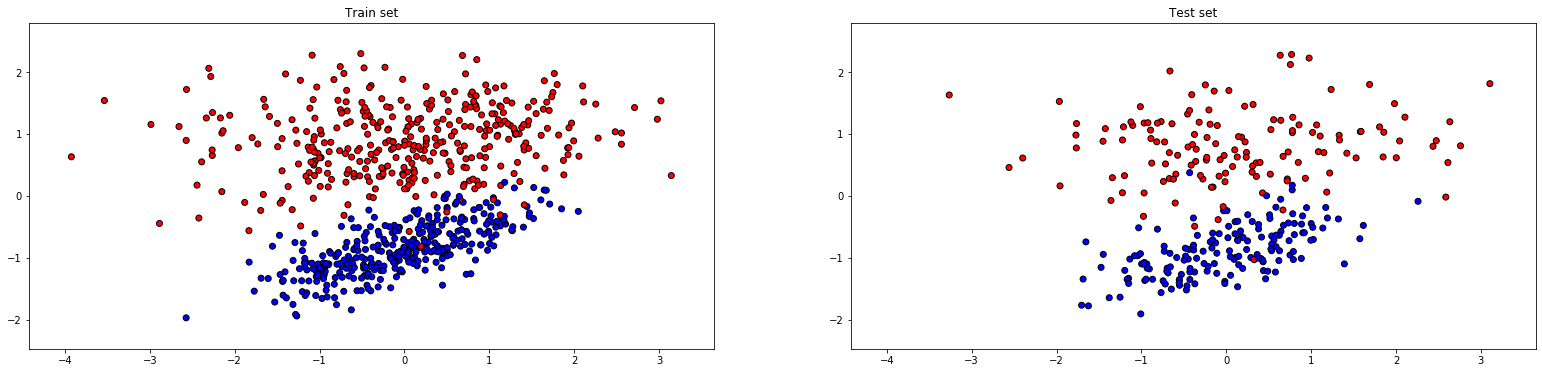

In [4]:
figure = plt.figure(figsize=(27, 6))
cm_bright = colors.ListedColormap(['#FF0000', '#0000FF'])

i = 1
def next_axis():
    global i
    ax = plt.subplot(1, 2, i)
    ax.set_xlim(X_min_lim[0], X_max_lim[0])
    ax.set_ylim(X_min_lim[1], X_max_lim[1])
    i += 1
    return ax

ax = next_axis()
ax.set_title('Train set')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

ax = next_axis()
ax.set_title('Test set')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k')

## Classifiers

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = {
    'Nearest Neighbors': KNeighborsClassifier(3),
    'Linear SVM': SVC(kernel='linear', C=0.025),
    'RBF SVM': SVC(gamma=2, C=1),
    'Gaussian Process': GaussianProcessClassifier(1.0 * RBF(1.0)),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    'Neural Net': MLPClassifier(alpha=1, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis(),
}

for name, clf in classifiers.items():
    print('Fit classifier:', name)
    clf.fit(X_train, y_train)

Fit classifier: Nearest Neighbors
Fit classifier: Linear SVM
Fit classifier: RBF SVM
Fit classifier: Gaussian Process
Fit classifier: Decision Tree
Fit classifier: Random Forest
Fit classifier: Neural Net
Fit classifier: AdaBoost
Fit classifier: Naive Bayes
Fit classifier: QDA


Inference classifier: Nearest Neighbors
Inference classifier: Linear SVM
Inference classifier: RBF SVM
Inference classifier: Gaussian Process
Inference classifier: Decision Tree
Inference classifier: Random Forest
Inference classifier: Neural Net
Inference classifier: AdaBoost
Inference classifier: Naive Bayes
Inference classifier: QDA


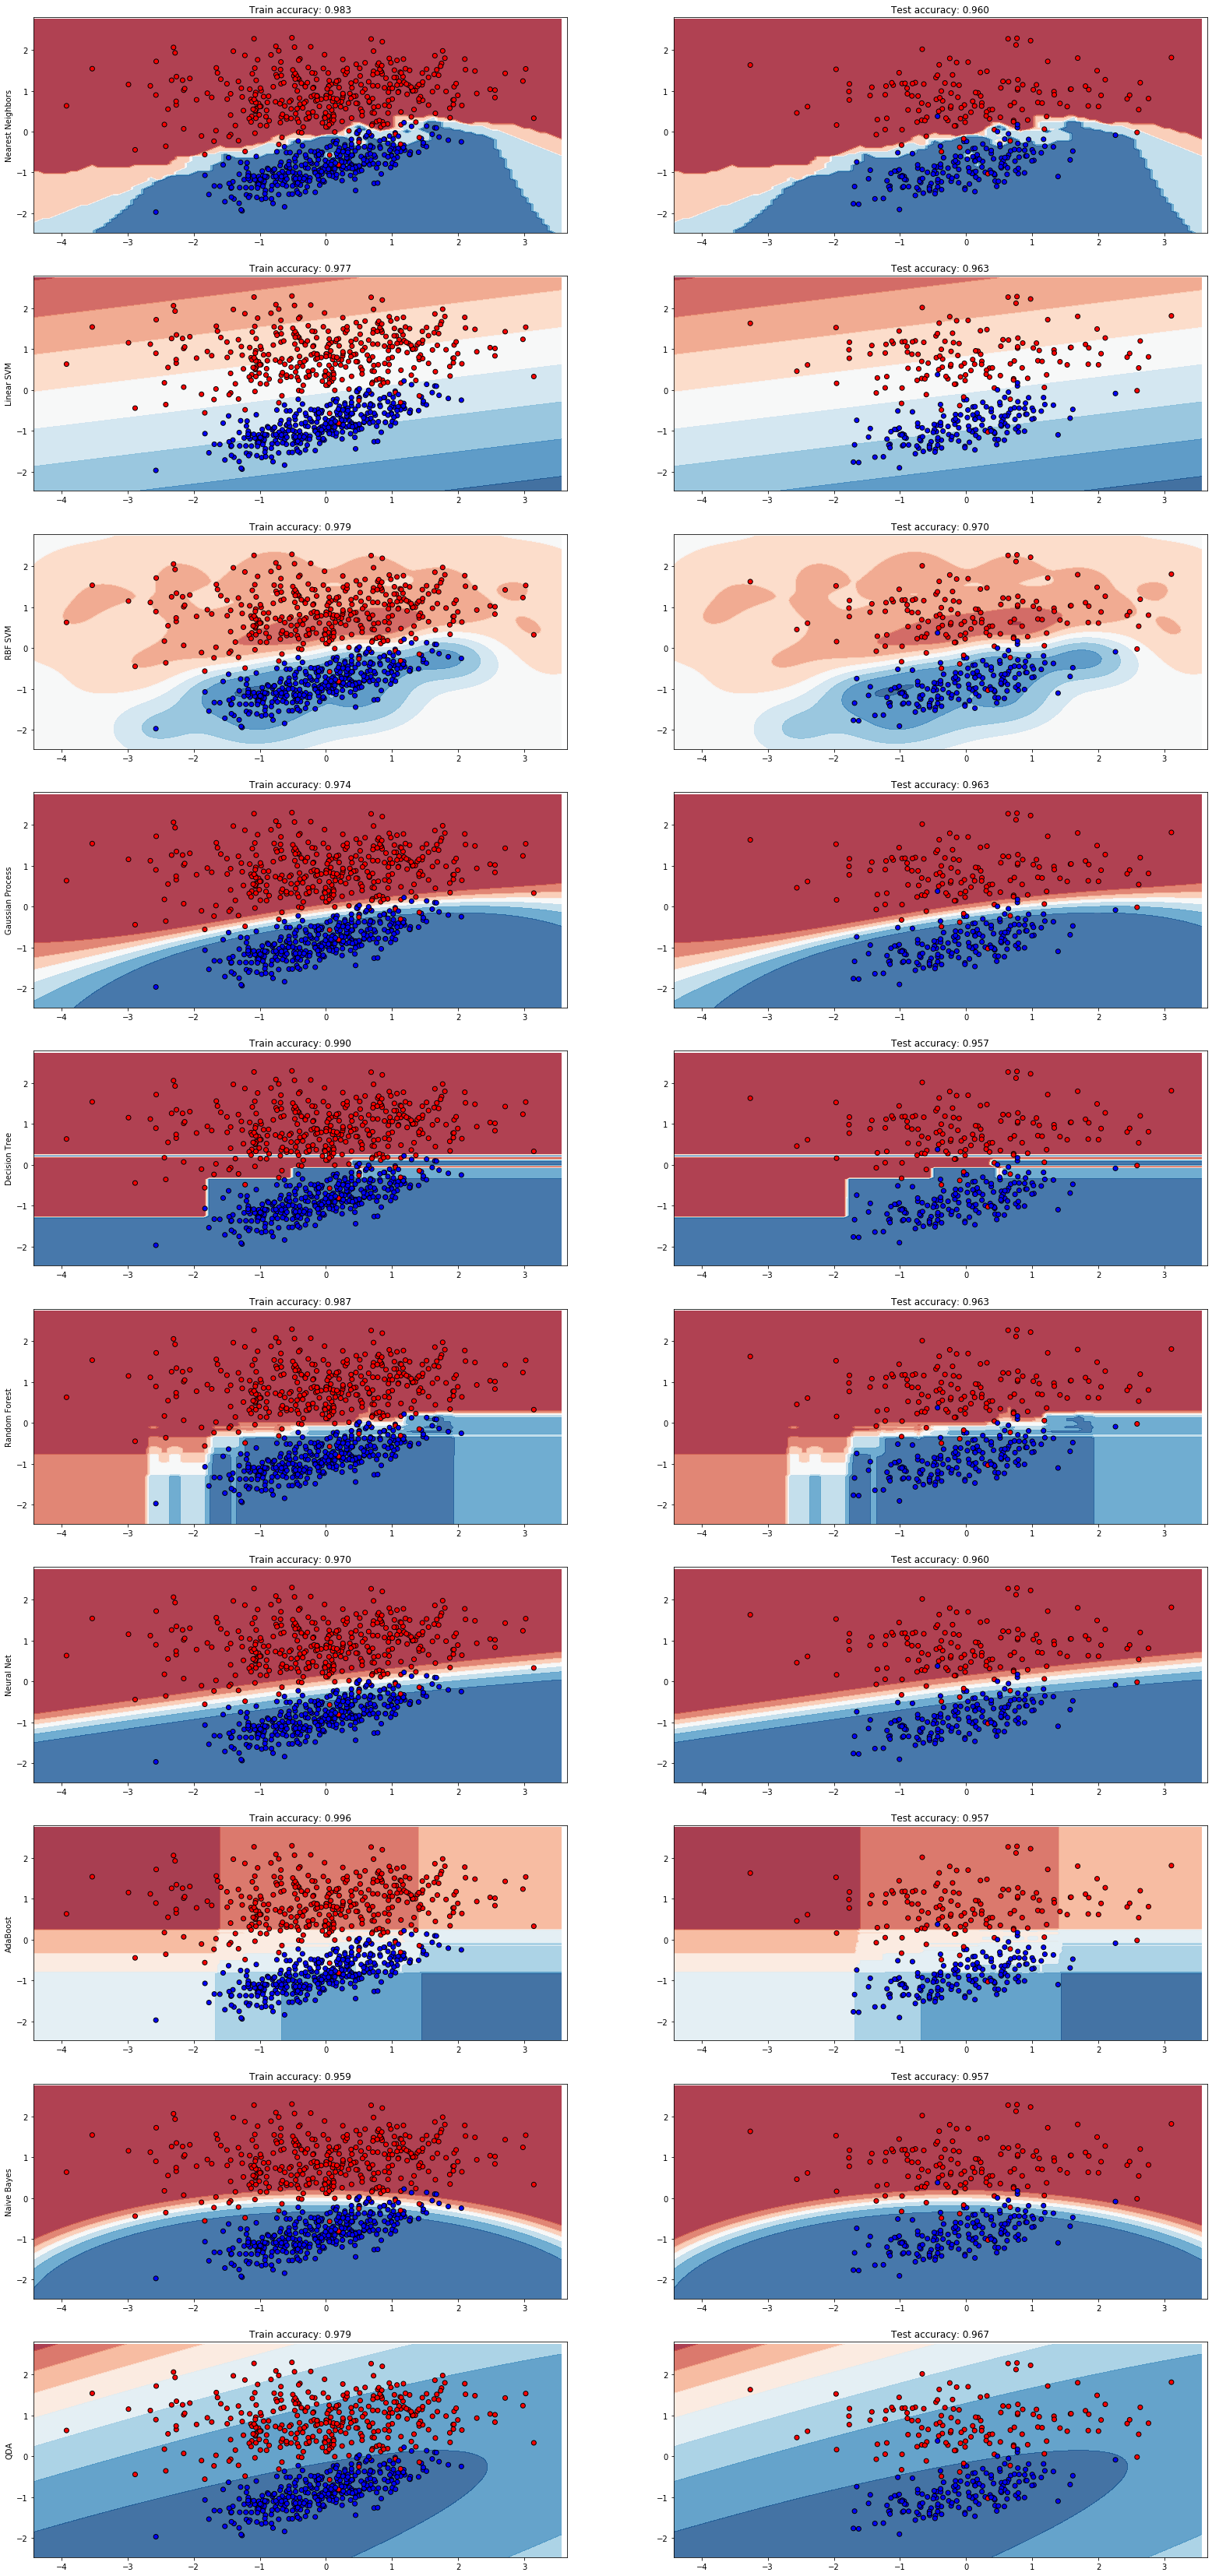

In [6]:
figure = plt.figure(figsize=(27, 6 * len(classifiers)))
cm = plt.cm.RdBu
cm_bright = colors.ListedColormap(['#FF0000', '#0000FF'])

i = 1
def next_axis():
    global i
    ax = plt.subplot(len(classifiers), 2, i)
    ax.set_xlim(X_min_lim[0], X_max_lim[0])
    ax.set_ylim(X_min_lim[1], X_max_lim[1])
    i += 1
    return ax

X_mesh, y_mesh = np.meshgrid(
    np.arange(X_min_lim[0], X_max_lim[0], (X_max_lim[0] - X_min_lim[0]) / 100.),
    np.arange(X_min_lim[1], X_max_lim[1], (X_max_lim[1] - X_min_lim[1]) / 100.)
)

for name, clf in classifiers.items():
    print('Inference classifier:', name)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
    if hasattr(clf, 'decision_function'):
        Z = clf.decision_function(np.c_[X_mesh.ravel(), y_mesh.ravel()])
    else:
        Z = clf.predict_proba(np.c_[X_mesh.ravel(), y_mesh.ravel()])[:, 1]

    Z = Z.reshape(X_mesh.shape)
    
    ax = next_axis()
    ax.set_ylabel(name)
    ax.set_title('Train accuracy: %.3f' % score_train)
    ax.contourf(X_mesh, y_mesh, Z, cmap=cm, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

    ax = next_axis()
    ax.set_title('Test accuracy: %.3f' % score_test)
    ax.contourf(X_mesh, y_mesh, Z, cmap=cm, alpha=.8)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k')